# Lab Part A

## Rankin half-body flow
**The Rankine half-body flow** is formed by superimposing a uniform (freestream) flow with a point source placed at the origin. The uniform flow moves in a straight line, while the source emits fluid radially outward. When combined, the two flows create a streamlined shape resembling a rounded hill, with a stagnation point where the two effects cancel. This idealized model helps visualize how fluid flows around blunt bodies in potential flow theory.



### Analytical Insight

A **source flow** represents fluid radiating outward from a point. It can be described using a velocity field $\left(x,y\right)$ at the source point:

$$\psi_\text{source}\left(x,y\right) = \frac{\sigma}{2\pi} \arctan \left(\frac{y-y_\text{source}}{x-x_\text{source}}\right)$$

and the velocity components are:

$$u_\text{source}\left(x,y\right) = \frac{\sigma}{2\pi} \frac{x-x_\text{source}}{\left(x-x_\text{source}\right)^2 + \left(y-y_\text{source}\right)^2}$$

$$v_\text{source}\left(x,y\right) = \frac{\sigma}{2\pi} \frac{y-y_\text{source}}{\left(x-x_\text{source}\right)^2 + \left(y-y_\text{source}\right)^2}$$

The stream function for this flow is:

$$
 \psi_{freestream} = U_\infty y
$$
 

The streamlines of the combination of a freestream and a source flow are:

$$\psi = \psi_{freestream}+\psi_{source} = U_\infty y + \frac{\sigma}{2\pi} \arctan \left(\frac{y-y_\text{source}}{x-x_\text{source}}\right)$$

And since differentiation is linear, the velocity field induced by the new flow pattern is simply the sum of the freestream velocity field and the source velocity field:

$$u = u_\text{freestream} + u_\text{source}$$
$$v = v_\text{freestream} + v_\text{source}$$

The stagnation points in the flow are points where the velocity is zero. To find their location, we solve the following equations:

$$u = 0 , \quad v = 0$$

which leads to (for a source at $\left(0,0 \right)$):

$$x_\text{stagnation} = x_\text{source} - \frac{\sigma}{2\pi U_\infty} = - \frac{\sigma}{2\pi U_\infty} $$

$$y_\text{stagnation} = y_\text{source} = 0$$

at the stagnation point:

$$\psi_{0} =  \frac{\sigma}{2\pi}$$


Therefore, the streamline expression at the face of the hill:

$$
\psi(x, y) = U_\infty y + \frac{\sigma}{2\pi} \arctan \left( \frac{y}{x- \frac{\sigma}{2\pi U_\infty}} \right) = \psi_0 
$$

the **max** value of the hill ocours when $( x \to \infty )$ :

$$U_\infty y_\text{max} = \frac{\sigma}{2\pi}$$
$$y_\text{max} = \frac{\sigma}{2U_\infty} $$

Given a freestream velocity of **20 m/s** and a maximum hill height of **40 meters**, we can compute the source strength \( \sigma \) using the expression:

$$
y_\text{max} = \frac{\sigma}{2U_\infty}
$$

Solving for \( \sigma \):

$$
\sigma = 2U_\infty y_\text{max}
$$

Substituting the known values:

$$
\sigma = 2 \cdot 20 \cdot 40 = 1600\ \text{m}^2/\text{s}
$$
the maximum wind velocity is located at the point (x = 0, y = 40).

**Horizontal component** (x-direction) comes only from the uniform flow:
$u = U_\infty = 20$

**Vertical component** (y-direction) comes only from the source:
$v = \frac{\sigma}{2\pi y} = \frac{1600}{2\pi \cdot 40} = \frac{20}{\pi} \approx 6.37$

Total velocity magnitude:
$|\vec{V}| = \sqrt{u^2 + v^2} = \sqrt{20^2 + \left( \frac{20}{\pi} \right)^2} \approx \sqrt{400 + 40.5} \approx \sqrt{440.5} \approx 21.0$










## numerical implementation

We now proceed with the **numerical implementation** of the Rankine flow using the previously defined freestream velocity and maximum hill height. The stagnation point is assumed to be located at the origin.


In [1]:
import numpy
import math
from matplotlib import pyplot
# display figures in the Notebook
%matplotlib inline

In [62]:
N = 240                               # Number of points in each direction
x_start, x_end = -120.0, 120.0            # x-direction boundaries
y_start, y_end = -60.0, 60.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid
numpy.shape(X)

(240, 240)

**free stream:** u = 20 m/s , $v=0$.

In [63]:
u_inf = 20.0        # freestream speed

# compute the freestream velocity field
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

# compute the stream-function
psi_freestream = u_inf * Y

**source flow:** the velocity components are:

$u_\text{source}\left(x,y\right) = \frac{\sigma}{2\pi} \frac{x-x_\text{source}}{\left(x-x_\text{source}\right)^2 + \left(y-y_\text{source}\right)^2}$

$v_\text{source}\left(x,y\right) = \frac{\sigma}{2\pi} \frac{y-y_\text{source}}{\left(x-x_\text{source}\right)^2 + \left(y-y_\text{source}\right)^2}$

In [64]:
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength / (2 * numpy.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * numpy.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v

In [65]:
??get_velocity

Signature: get_velocity(strength, xs, ys, X, Y)
Source:   
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength / (2 * numpy.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * numpy.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v
File:      c:\users\morde\appdata\local\temp\ipykernel_16136\3761943954.py
Type:      function

In [66]:
def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (2 * numpy.pi) * numpy.arctan2((Y - ys), (X - xs))
    
    return psi

for a source at $\left(0,0 \right)$), $\sigma = 4 \cdot 20 \cdot 40 = 1600\ \text{m}^2/\text{s}$

In [67]:
strength_source = 1600.0            # strength of the source
x_source, y_source = 0.0, 0.0   # location of the source

# compute the velocity field
u_source, v_source = get_velocity(strength_source, x_source, y_source, X, Y)

# compute the stream-function
psi_source = get_stream_function(strength_source, x_source, y_source, X, Y)

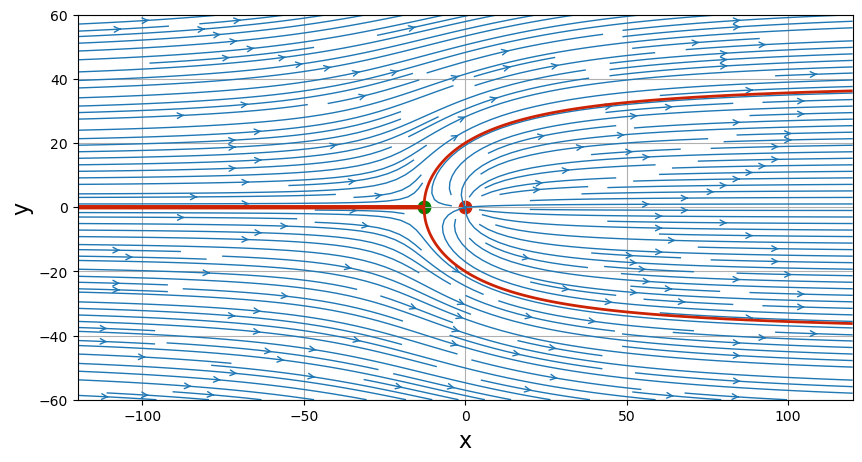

In [68]:
# superposition of the source on the freestream
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

# calculate the stagnation point
x_stagnation = x_source - strength_source / (2 * numpy.pi * u_inf)
y_stagnation = y_source

# display the stagnation point
pyplot.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')

# display the dividing streamline
pyplot.contour(X, Y, psi, 
               levels=[-strength_source / 2, strength_source / 2], 
               colors='#CD2305', linewidths=2, linestyles='solid');
pyplot.show()

We first calculated the maximum velocity analytically at the point (x = 0, y = 40):

$
u = 20 m/s ,  v = 6.37 m/s  ,
$
$|\vec{V}| = \sqrt{u^2 + v^2} \approx 21.0 m/s
$

We will now compute the velocity numerically using the velocity field data.

In [70]:
# Evaluate velocity at point (x=0, y=40)
x_target = 0
y_target = 40

# Find nearest grid point
i = numpy.abs(x - x_target).argmin()  # index in x-direction (columns)
j = numpy.abs(y - y_target).argmin()  # index in y-direction (rows)

# Extract velocity components
u_val = u[j, i]
v_val = v[j, i]
V_mag = numpy.sqrt(u_val**2 + v_val**2)

# Print results
print(f"Velocity at (x=0, y=40):")
print(f"u = {u_val:.4f}, v = {v_val:.4f}, |V| = {V_mag:.4f}")

Velocity at (x=0, y=40):
u = 20.0802, v = 6.3785, |V| = 21.0690


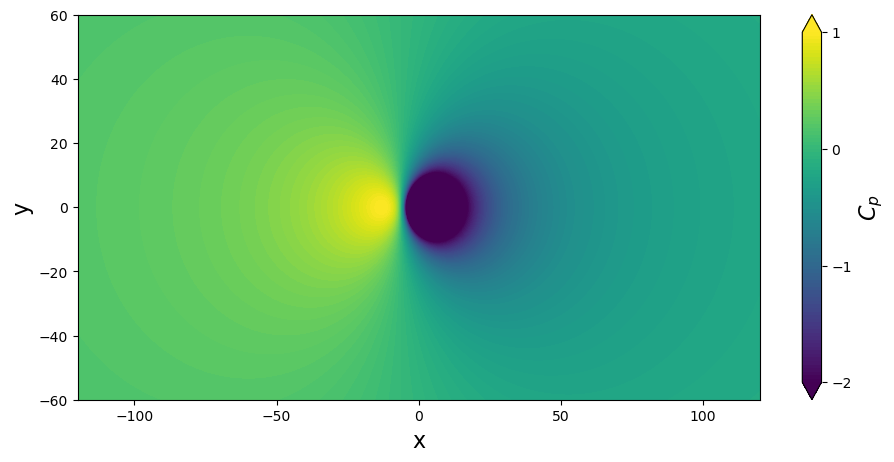

In [76]:
# compute the pressure coefficient field
cp = 1.0 - (u**2 + v**2) / u_inf**2

# plot the pressure coefficient field
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp,
                        levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])


pyplot.show()

C:\Users\morde\AppData\Local\Temp\ipykernel_16136\961426275.py:20: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  y_solution, = fsolve(stream_function_residual, y_guess, args=(x, U_inf, sigma, psi_0))
C:\Users\morde\AppData\Local\Temp\ipykernel_16136\961426275.py:20: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last five Jacobian evaluations.
  y_solution, = fsolve(stream_function_residual, y_guess, args=(x, U_inf, sigma, psi_0))


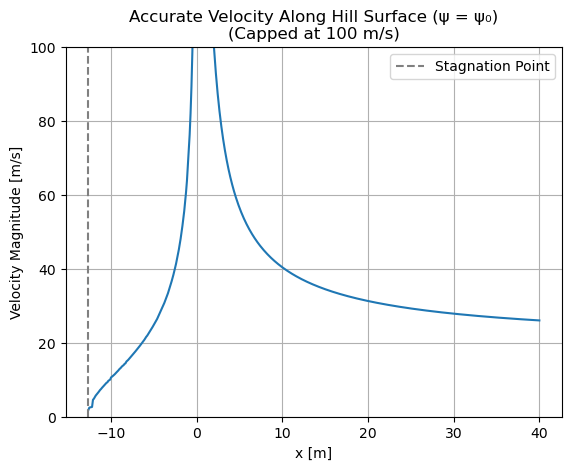

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# נתונים
U_inf = 20                      # מהירות הזרימה
sigma = 1600                   # עוצמת המקור
psi_0 = sigma / (2 * np.pi)    # קו הזרם על שפת הגבעה
x_stagnation = -sigma / (2 * np.pi * U_inf)

# פונקציית שיור לפתרון ψ(x, y) = ψ0
def stream_function_residual(y, x, U_inf, sigma, psi_0):
    return U_inf * y + (sigma / (2 * np.pi)) * np.arctan2(y, x) - psi_0

# פתרון נומרי עבור y(x) על שפת הגבעה
def compute_accurate_y_on_hill(x_vals, U_inf, sigma, psi_0):
    y_vals = []
    for x in x_vals:
        y_guess = 1.0
        y_solution, = fsolve(stream_function_residual, y_guess, args=(x, U_inf, sigma, psi_0))
        y_vals.append(y_solution)
    return np.array(y_vals)

# חישוב המהירות הכוללת לאורך שפת הגבעה
def compute_velocity_on_accurate_hill(x_vals):
    y_vals = compute_accurate_y_on_hill(x_vals, U_inf, sigma, psi_0)
    u = U_inf + sigma / (2 * np.pi) * x_vals / (x_vals**2 + y_vals**2)
    v = sigma / (2 * np.pi) * y_vals / (x_vals**2 + y_vals**2)
    V = np.sqrt(u**2 + v**2)
    return V, y_vals

# טווח x (נמנעים מ-x קרוב מדי לאפס בגלל סינגולריות)
x_vals = np.linspace(x_stagnation + 0.1, 40, 500)
V_vals, y_vals = compute_velocity_on_accurate_hill(x_vals)

# גרף עם הגבלת ציר y עד 100
plt.plot(x_vals, V_vals)
plt.axvline(x=x_stagnation, color='gray', linestyle='--', label='Stagnation Point')
plt.ylim(0, 100)  # הגבלת ציר y
plt.xlabel("x [m]")
plt.ylabel("Velocity Magnitude [m/s]")
plt.title("Accurate Velocity Along Hill Surface (ψ = ψ₀)\n(Capped at 100 m/s)")
plt.grid(True)
plt.legend()
plt.show()